In [3]:
import numpy as np
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina'

\begin{align}
K_{ij} =& \kappa e^{-\beta E_{ij}}\\
\frac{\partial \phi_i}{\partial t} =& \sum_j (K_{ij}\phi_j - K_{ji}\phi_i)
\end{align}

$$ \sum_nK_{ni}\delta_{ij}- K_{ij} = A_{ij}$$

\begin{align}
\frac{\partial \phi_i}{\partial t} =& \sum_jA_{ij}\phi_j\\
M\frac{\partial\phi}{\partial t}+ \Lambda M\phi =& 0\\
\frac{\partial\psi_i}{\partial t}+ \Lambda_i \psi_i =& 0\\
\end{align}

$$\psi_i(t) = \psi^0_i e^{-\Lambda_i t}$$

\begin{align}
\phi_i(t) =& M_{ji} \psi^0_je^{-\Lambda_j t}\\
=& M_{ji} M_{jk}\phi^0_ke^{-\Lambda_j t}
\end{align}

In [4]:
N = 50
MM = 50
n_interface=2

In [5]:
def get_K(N,M,T,E_fcc,E_bcc,Ebcc_to_int,Eint_to_fcc,Efcc_to_int,Eint_to_bcc,kappa,n_interface,m_interface):
    indices = np.arange(N * M)
    indices_mat = indices.reshape((N,M))
    K = np.zeros(2*[len(indices)])
    logkappa=np.log(kappa)
    K[indices_mat.flatten(), np.roll(indices_mat, 1, axis=0).flatten()] = np.exp(-E_fcc/kB/T+logkappa)
    K[indices_mat.flatten(), np.roll(indices_mat, -1, axis=0).flatten()] = np.exp(-E_fcc/kB/T+logkappa)
    K[indices_mat.flatten(), np.roll(indices_mat, 1, axis=1).flatten()] =  np.exp(-E_fcc/kB/T+logkappa)
    K[indices_mat.flatten(), np.roll(indices_mat, -1, axis=1).flatten()] = np.exp(-E_fcc/kB/T+logkappa)
    K[np.roll(indices_mat, 1, axis=1)[:, :m_interface*M//n_interface], indices_mat[:, :m_interface*M//n_interface]] =np.exp(-E_bcc/kB/T+logkappa)
    K[np.roll(indices_mat, -1, axis=1)[:, :m_interface*M//n_interface], indices_mat[:, :m_interface*M//n_interface]] =np.exp(-E_bcc/kB/T+logkappa)
    
    K[np.roll(indices_mat, 1, axis=1)[:,m_interface*M//n_interface], indices_mat[:, m_interface*M//n_interface]] = np.exp(-Ebcc_to_int/kB/T+logkappa)
    K[np.roll(indices_mat, -1, axis=1)[:,  m_interface*M//n_interface], indices_mat[:, m_interface*M//n_interface]] = np.exp(-Eint_to_bcc/kB/T+logkappa)
    K[np.roll(indices_mat, 1, axis=1)[:,  m_interface*M//n_interface+1], indices_mat[:, m_interface*M//n_interface+1]] = np.exp(-Eint_to_fcc/kB/T+logkappa)
    K[np.roll(indices_mat, -1, axis=1)[:,  m_interface*M//n_interface+1], indices_mat[:, m_interface*M//n_interface+1]] = np.exp(-Efcc_to_int/kB/T+logkappa)

    
    K[np.roll(indices_mat, 1, axis=1)[:, M-3], indices_mat[:, M-3]] = np.exp(-Efcc_to_int/kB/T+logkappa)
    K[np.roll(indices_mat, -1, axis=1)[:, M-3], indices_mat[:, M-3]] = np.exp(-Eint_to_fcc/kB/T+logkappa)
    K[np.roll(indices_mat, 1, axis=1)[:, M-2], indices_mat[:, M-2]] = np.exp(-Eint_to_bcc/kB/T+logkappa)
    K[np.roll(indices_mat, -1, axis=1)[:, M-2], indices_mat[:, M-2]] = np.exp(-Ebcc_to_int/kB/T+logkappa)
    K[np.roll(indices_mat, 1, axis=1)[:, M-1], indices_mat[:, M-1]] = np.exp(-E_bcc/kB/T+logkappa)
    K[np.roll(indices_mat, -1, axis=1)[:, M-1], indices_mat[:, M-1]] = np.exp(-E_bcc/kB/T+logkappa)


    plt.imshow(K)
    plt.colorbar()
    return K

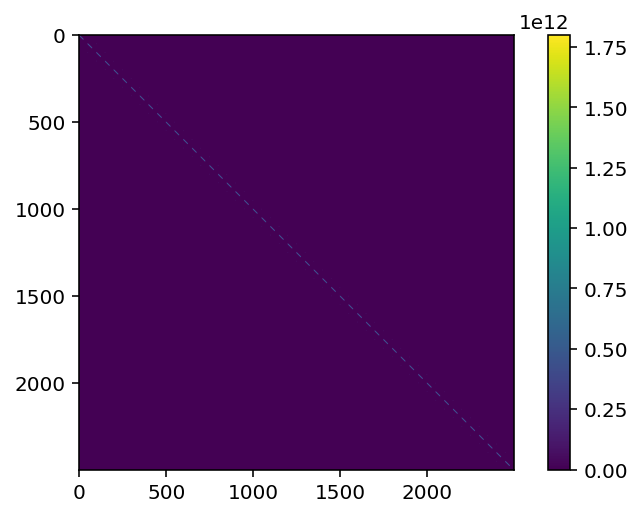

In [6]:
E_fcc=0.42
E_bcc=0.05
Ebcc_to_int=0.3
Eint_to_fcc=0.65
Efcc_to_int=0.4
Eint_to_bcc=0.7
kB=0.025/300
kappa=10**(13)
T=350
n_interface=2
m_interface=1
K=get_K(N,MM,T,E_fcc,E_bcc,Ebcc_to_int,Eint_to_fcc,Efcc_to_int,Eint_to_bcc,kappa,n_interface,m_interface)
#T_list=[250,300,350]
#K_list = [get_K(N,T,E_fcc,E_bcc,Ebcc_to_int,Eint_to_fcc,Efcc_to_int,Eint_to_bcc,kappa) for T in T_list]


In [7]:
# %%time
# from scipy.linalg import eig_banded
# A= K.sum(axis=0) * np.eye(len(K)) - K
# #print(np.shape(omega_list[0]))
# #plt.imshow(K_list[2])
# #omega, M = np.linalg.eig(A)
# omega, M = eig_banded(A)


In [8]:
%%time
from scipy.linalg import eig_banded
A= K.sum(axis=0) * np.eye(len(K)) - K
#print(np.shape(omega_list[0]))
#plt.imshow(K_list[2])
omega, M = np.linalg.eig(A)
#omega, M = eig_banded(A)


CPU times: user 3min 21s, sys: 2.12 s, total: 3min 23s
Wall time: 5.63 s


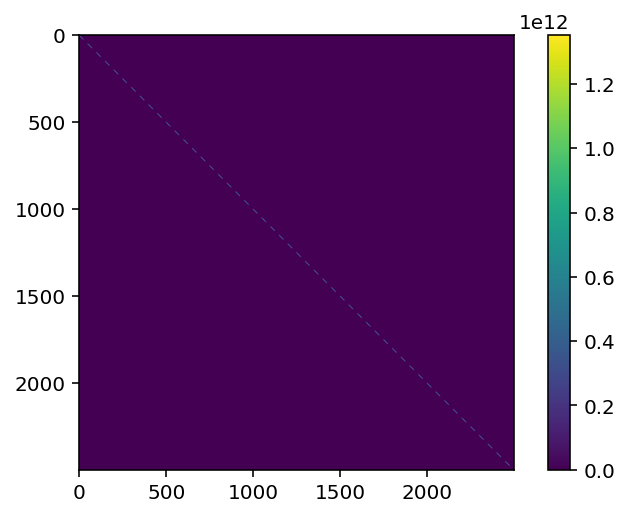

In [9]:
T=300
K=get_K(N,MM,T,E_fcc,E_bcc,Ebcc_to_int,Eint_to_fcc,Efcc_to_int,Eint_to_bcc,kappa,n_interface,m_interface)
A= K.sum(axis=0) * np.eye(len(K)) - K
#omegaH, MH = np.linalg.eigh(A)
omega, M = np.linalg.eig(A)
ordered_M_300=M.T[np.argsort(np.real(omega))].T
omega_300=omega.copy()

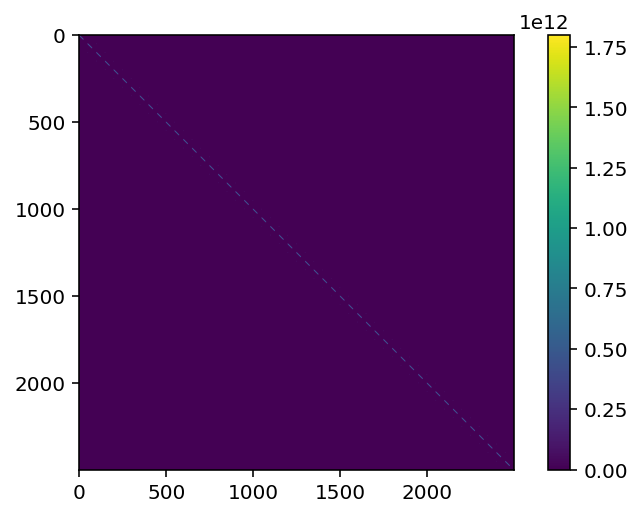

In [10]:
T=350
K=get_K(N,MM,T,E_fcc,E_bcc,Ebcc_to_int,Eint_to_fcc,Efcc_to_int,Eint_to_bcc,kappa,n_interface,m_interface)
A= K.sum(axis=0) * np.eye(len(K)) - K
#omegaH, MH = np.linalg.eigh(A)
omega, M = np.linalg.eig(A)

ordered_M_350=M.T[np.argsort(np.real(omega))].T
omega_350=omega.copy()

In [121]:
print(np.sort(np.real(omega)))
print(np.sort(np.real(omegaH)))

[4.47034836e-08 8.79037909e+04 8.79037909e+04 ... 4.45033258e+07
 4.45033258e+07 4.45912295e+07]
[-7.46336735e-10  8.79037909e+04  8.79037909e+04 ...  4.45033258e+07
  4.45033258e+07  4.45912295e+07]


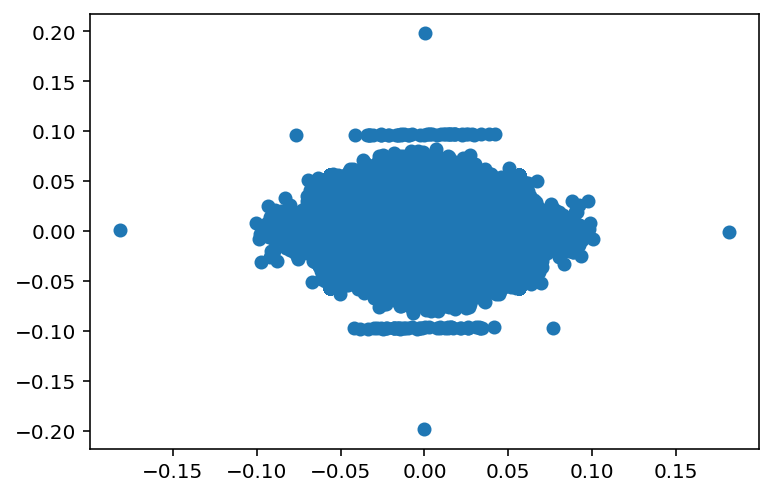

In [130]:
plt.scatter(ordered_M_350.T,ordered_M_300.T)

In [119]:
omega[np.argsort(np.real(omega))]
ordered_M_350.T[0]

array([-0.02+0.j,  0.02+0.j, -0.02+0.j, ...,  0.02+0.j,  0.02+0.j,
        0.02+0.j])

/u/system/SLES12/soft/pyiron/dev/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


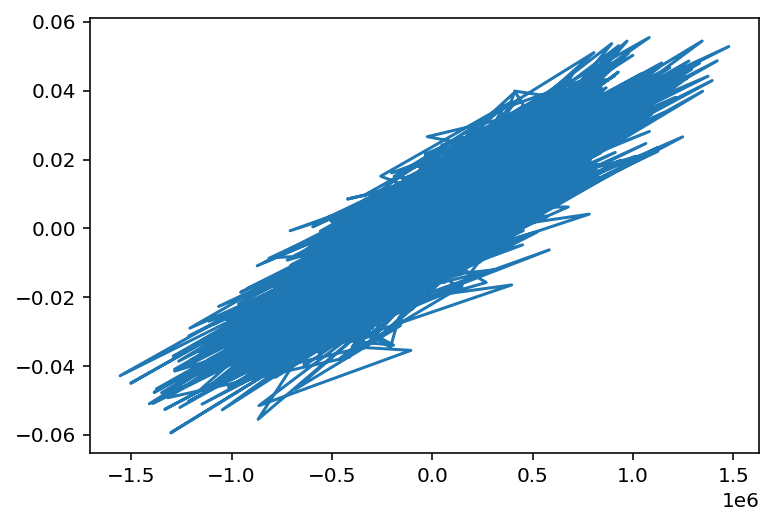

In [88]:
plt.plot(np.matmul(A,ordered_M_350[0]),ordered_M_350[0])

In [373]:
# # %%time
# # omega_list=np.zeros((len(A_list), len(K_list[0])))*1j
# # M_list= np.zeros((len(A_list), ) + K_list[0].shape)*1j
# # for i,A in enumerate(A_list):
# #     omega_list[i], M_list[i] = np.linalg.eig(A)
# #     print(i)


# np.absolute(omega_list.imag).max()
# np.absolute(M_list.imag).max()

# np.absolute(np.sum(M_list[0]*M_list[1],axis=0))

# plt.hist(np.absolute(np.sum(M_list[0]*M_list[1],axis=0)))

# plt.plot(np.diff(omega_list[1]))

In [ ]:
experiment=[[],[],[]]

(array([2.167e+03, 2.200e+01, 1.200e+01, 2.000e+00, 1.200e+01, 6.000e+00,
        6.000e+00, 2.000e+00, 1.200e+01, 0.000e+00, 8.000e+00, 0.000e+00,
        1.000e+01, 1.000e+01, 6.000e+00, 6.000e+00, 4.800e+01, 4.000e+00,
        8.000e+00, 8.000e+00, 4.000e+00, 2.000e+00, 1.400e+01, 2.000e+00,
        1.200e+01, 8.000e+00, 0.000e+00, 8.000e+00, 0.000e+00, 4.000e+00,
        6.000e+00, 4.000e+00, 8.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        4.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        2.000e+00, 1.200e+01, 2.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 4.000e+00, 2.000e+0

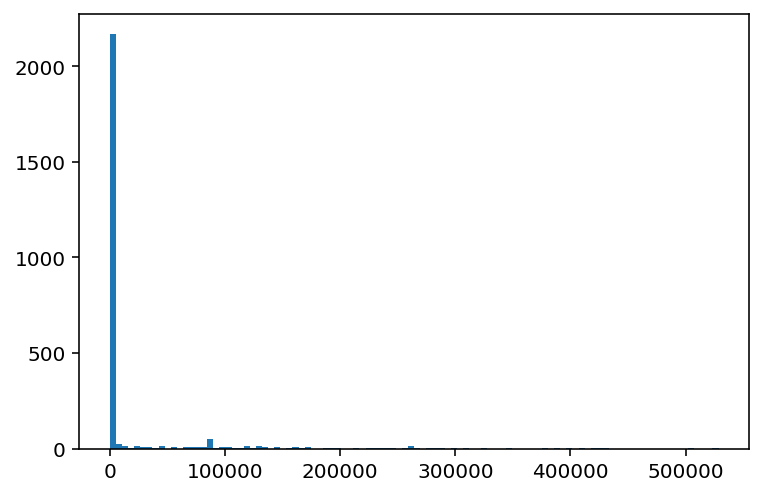

In [51]:
#plt.yscale('log')
plt.hist(np.diff(np.sort(omega_350).real),bins=100)

/u/system/SLES12/soft/pyiron/dev/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


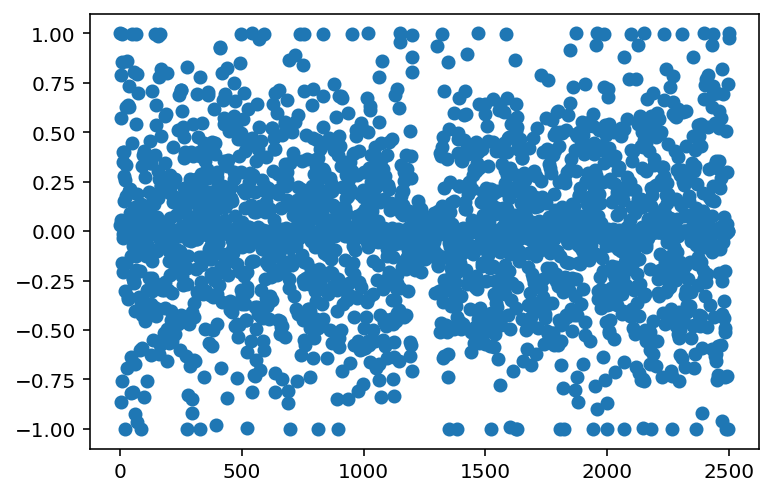

In [42]:
plt.plot(np.sum(ordered_M_350*ordered_M_300,axis=1),'o')

/u/system/SLES12/soft/pyiron/dev/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


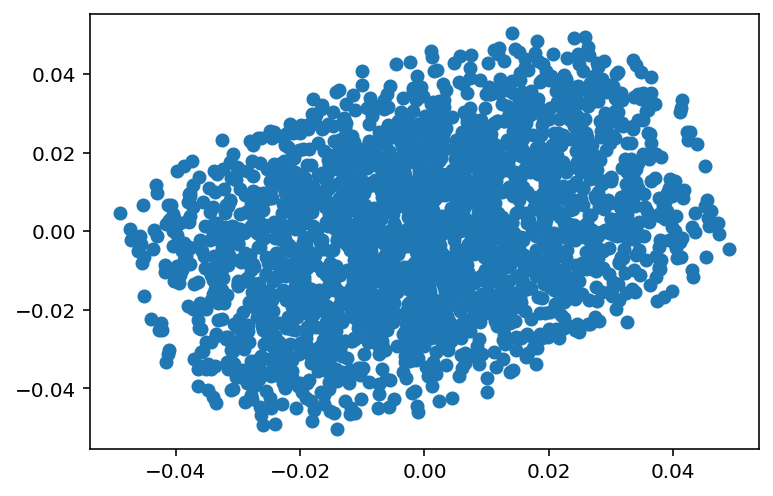

In [65]:
plt.plot(ordered_M_350[2450],ordered_M_300[2450],'o')

In [58]:
print(ordered_M_350[0])
print(ordered_M_300[0])
np.shape(ordered_M_300)

[-0.02+0.j -0.02+0.j -0.02+0.j ... -0.02+0.j -0.02+0.j -0.02+0.j]
[-0.02+0.j -0.02+0.j -0.02+0.j ... -0.02+0.j -0.02+0.j -0.02+0.j]


(2500, 2500)

##charging

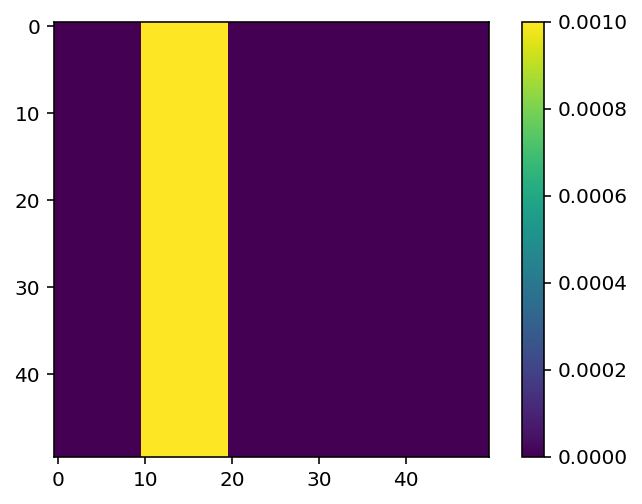

In [12]:
#c = 0.0001
phi = np.random.random((N, MM))
c=0
phi *= c / np.mean(phi)
phi[:,MM//5:2*MM//5]=0.001
phi.mean()

plt.imshow(phi)
plt.colorbar()

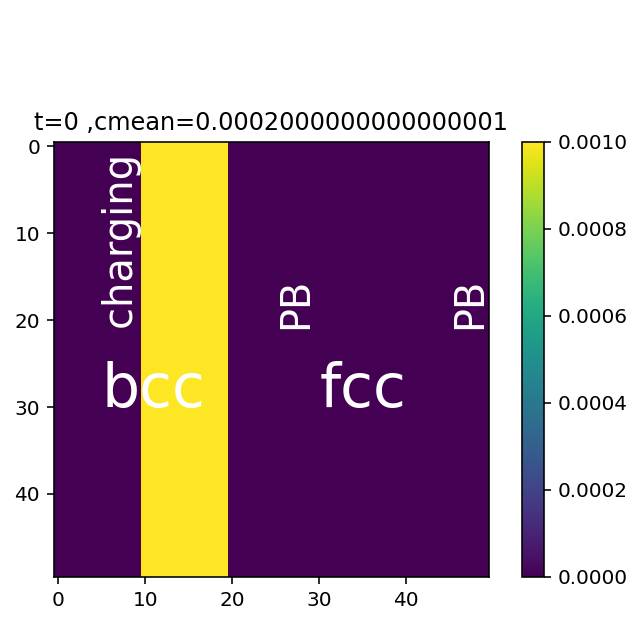

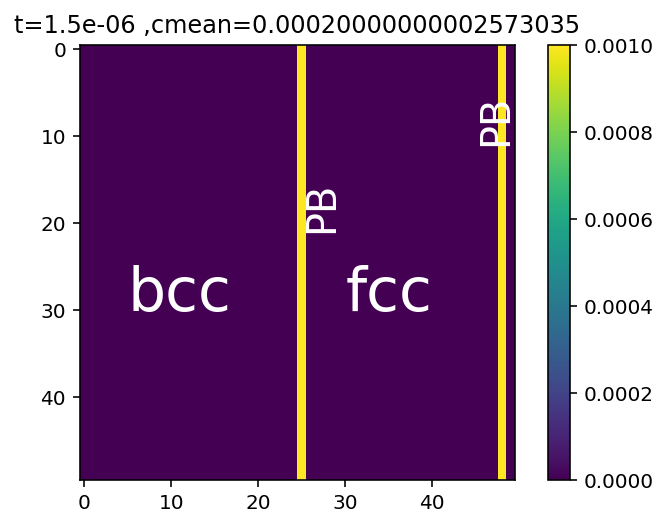

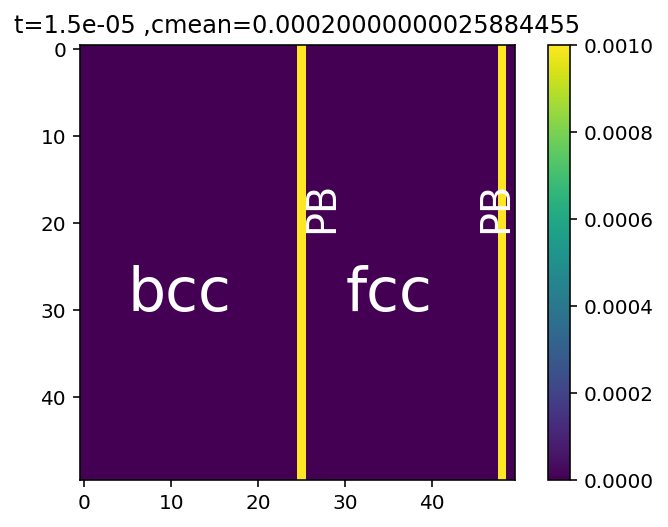

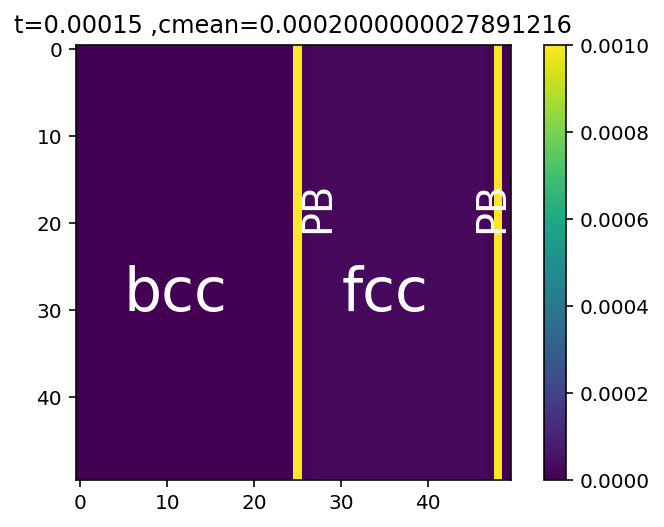

In [13]:
t = 0
phi_init = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_init)
plt.clim(0, 0.001)
plt.colorbar();
plt.title('t='+str(t)+' ,cmean='+str(phi_init.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(5,20,'charging region',color='white',fontsize=20,rotation=90)

plt.show()
t = 0.00000150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.clim(0, 0.001)
plt.colorbar();
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,10,'PB',color='white',fontsize=20,rotation=90)
plt.show()
t = 0.0000150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.clim(0, 0.001)
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.colorbar();
plt.show()
t =  0.000150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.clim(0, 0.001)
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.colorbar();
plt.show()


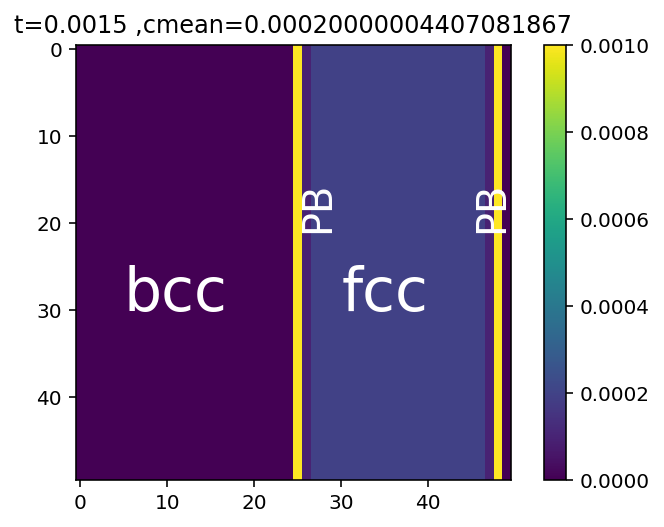

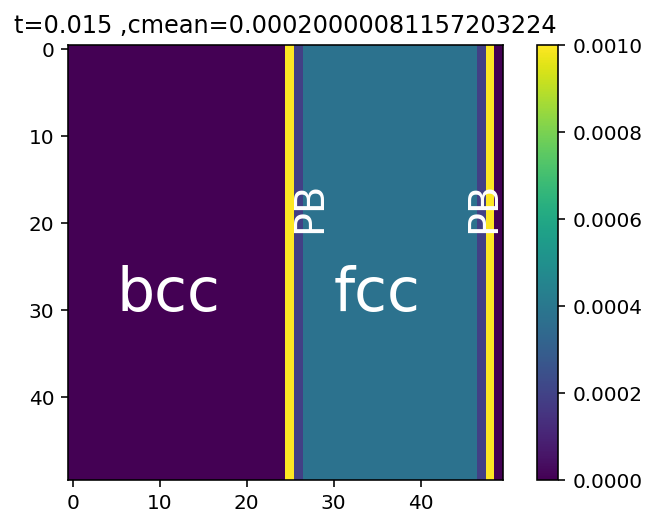

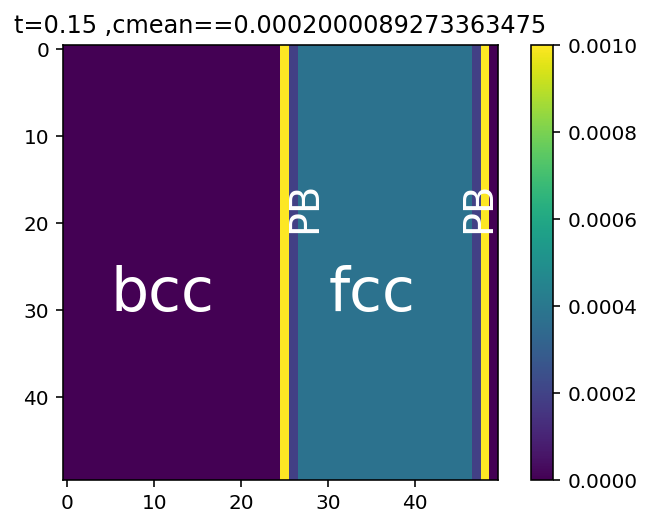

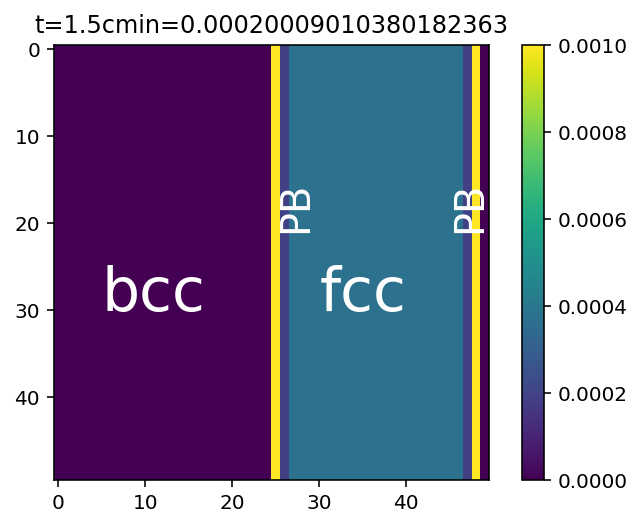

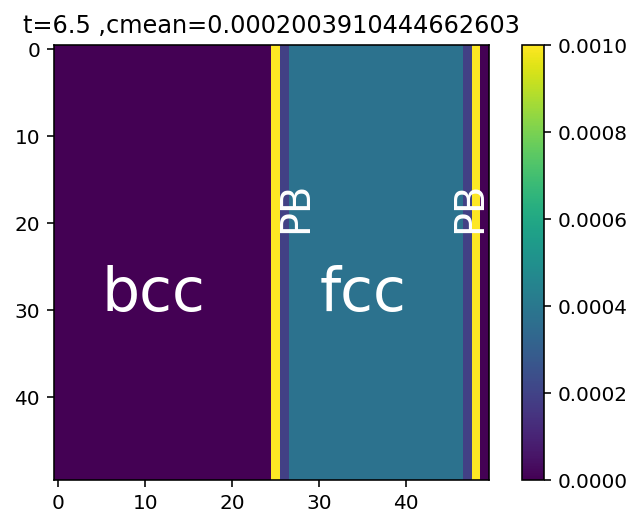

In [15]:
t =  0.00150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.clim(0, 0.001)
plt.colorbar();
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.show()
t = 0.0150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.clim(0, 0.001)
plt.colorbar();
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.show()
t = 0.150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.clim(0, 0.001)
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.colorbar();
plt.title('t='+str(t)+' ,cmean=='+str(phi_final.mean()))
plt.show()
t = 1.5
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.clim(0, 0.001)
plt.colorbar();
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.title('t='+str(t)+'cmin='+str(phi_final.mean()))
plt.show()

t = 6.50
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.clim(0, 0.001)
plt.colorbar();
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.show()

In [377]:
print(phi_final.mean())
phi.mean()

0.000199622956015103


0.0002

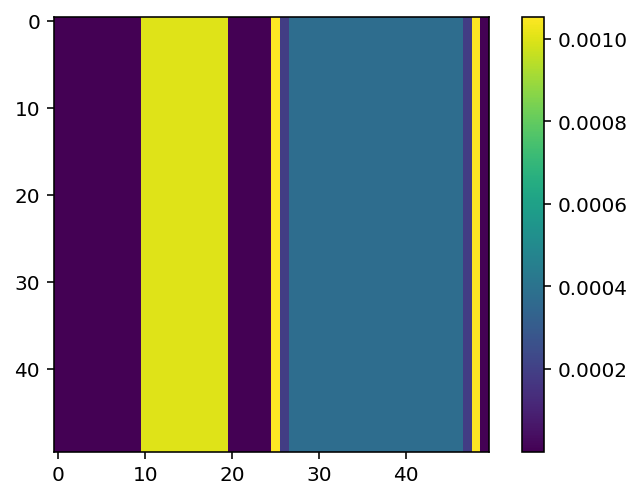

In [16]:
#CHARGING
phi=np.copy(phi_final)
phi[:,MM//5:2*MM//5]=0.001
phi.mean()

plt.imshow(phi)
plt.colorbar()

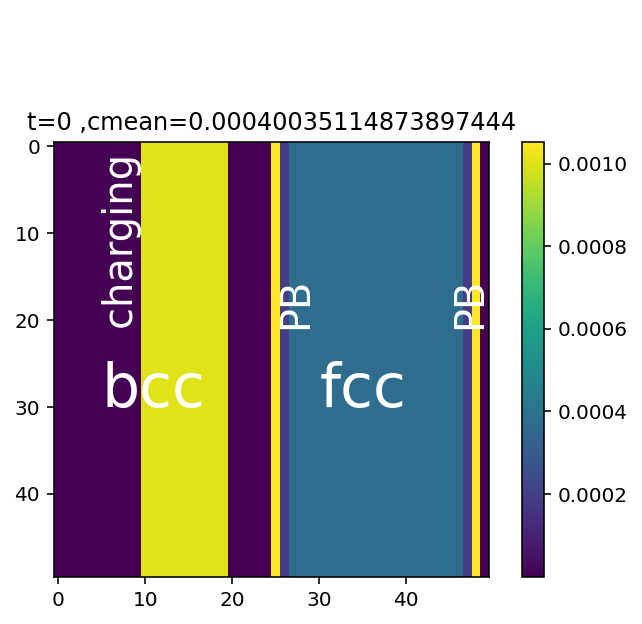

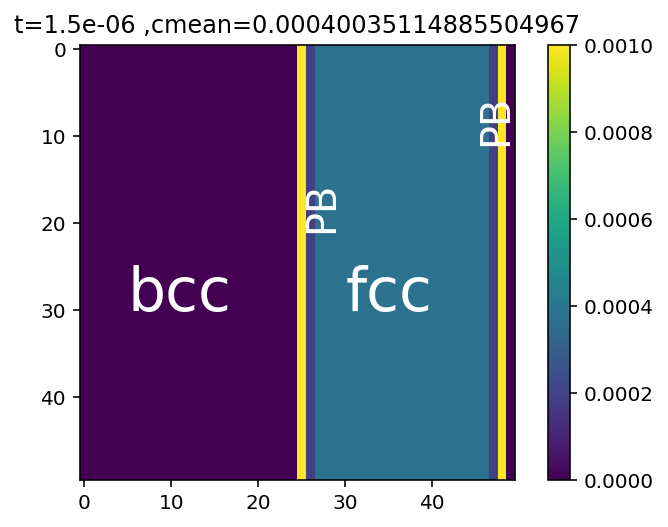

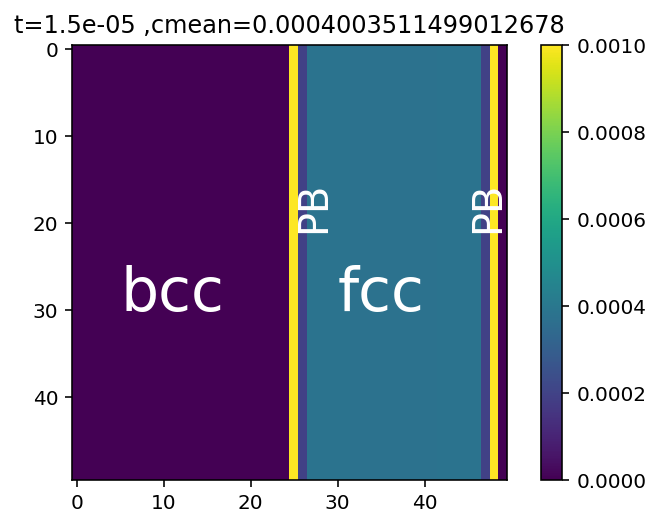

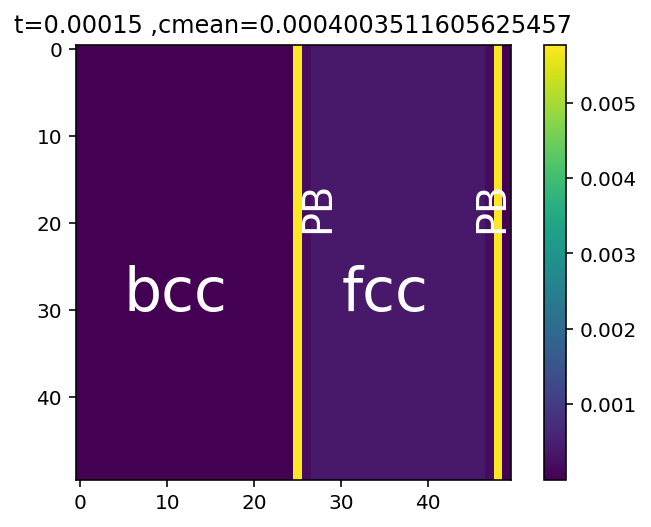

In [17]:
t = 0
phi_init = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_init)
#plt.clim(0, 0.001)
plt.colorbar();
plt.title('t='+str(t)+' ,cmean='+str(phi_init.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(5,20,'charging region',color='white',fontsize=20,rotation=90)

plt.show()
t = 0.00000150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.clim(0, 0.001)
plt.colorbar();
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,10,'PB',color='white',fontsize=20,rotation=90)
plt.show()
t = 0.0000150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.clim(0, 0.001)
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.colorbar();
plt.show()
t =  0.000150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
#plt.clim(0, 0.001)
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.colorbar();
plt.show()


CPU times: user 3min 48s, sys: 3.84 s, total: 3min 52s
Wall time: 6.14 s


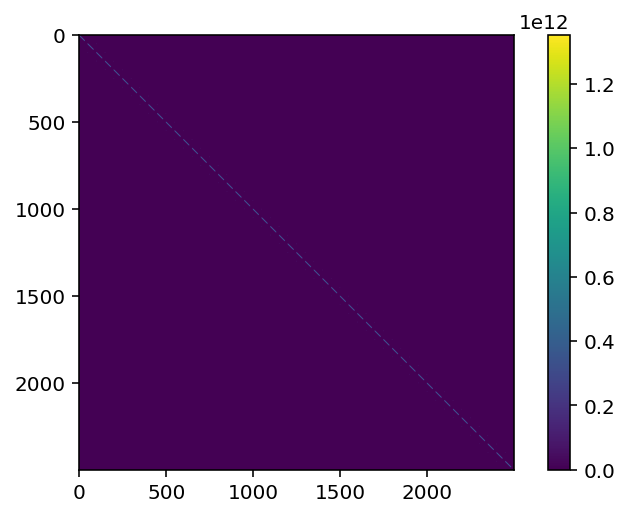

In [18]:
%%time
n_interface=3 ###PHase transformation fcc region become narrower######
m_interface=2
E_fcc=0.42
E_bcc=0.05
Ebcc_to_int=0.3
Eint_to_fcc=0.65
Efcc_to_int=0.4
Eint_to_bcc=0.7
kB=0.025/300
kappa=10**(13)
T=300

K=get_K(N,MM,T,E_fcc,E_bcc,Ebcc_to_int,Eint_to_fcc,Efcc_to_int,Eint_to_bcc,kappa,n_interface,m_interface)
A= K.sum(axis=0) * np.eye(len(K)) - K
omega, M = np.linalg.eig(A)
#omega, M = eig_banded(A)

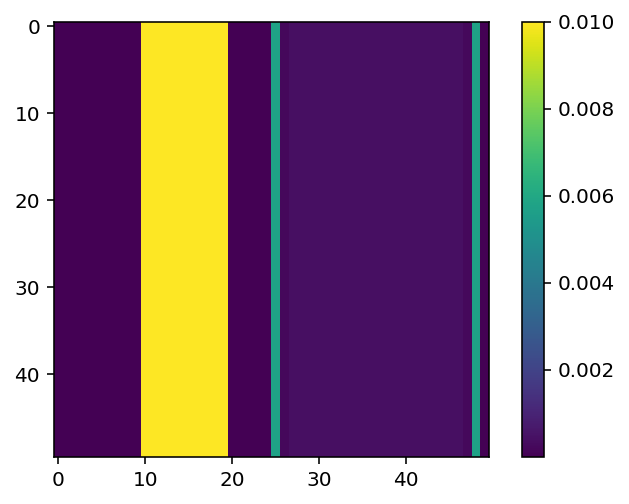

In [19]:
#c = 0.0001
#phi = np.random.random((N, N))
#c=0
#phi *= c / np.mean(phi)
phi=np.copy(phi_final)
phi[:,MM//5:2*MM//5]+=0.01
phi.mean()
plt.imshow(phi)
plt.colorbar()

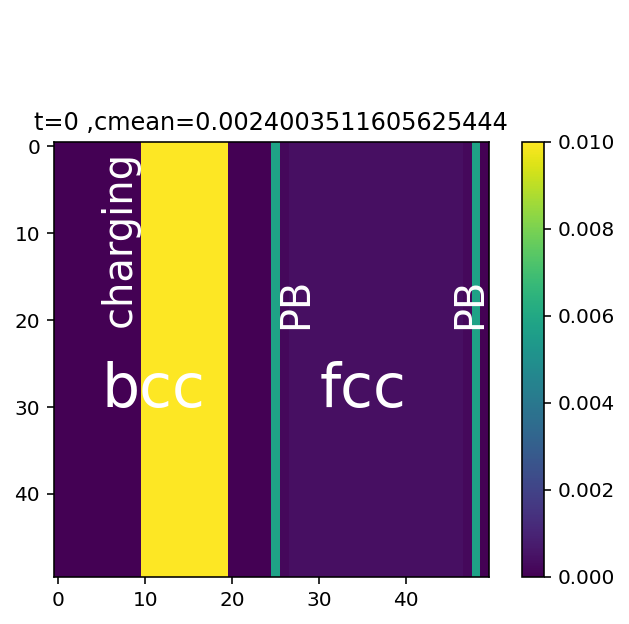

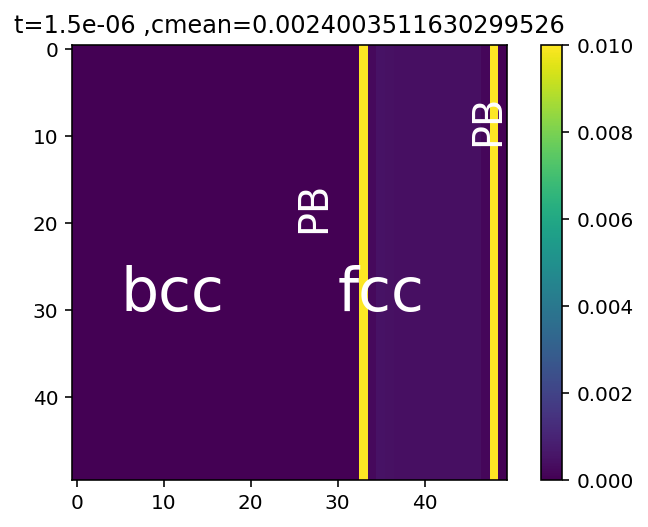

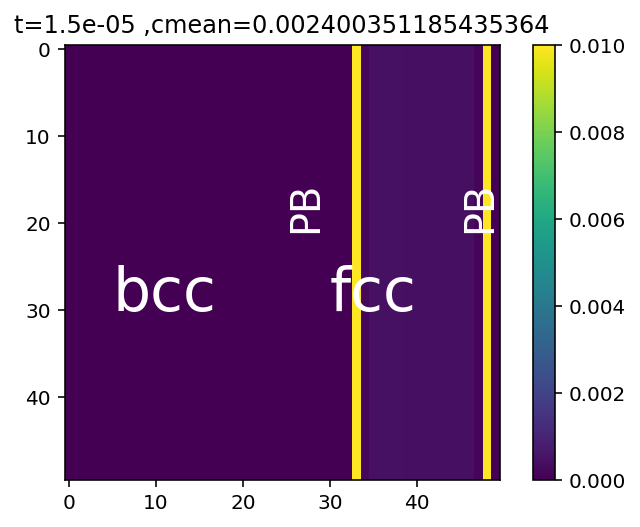

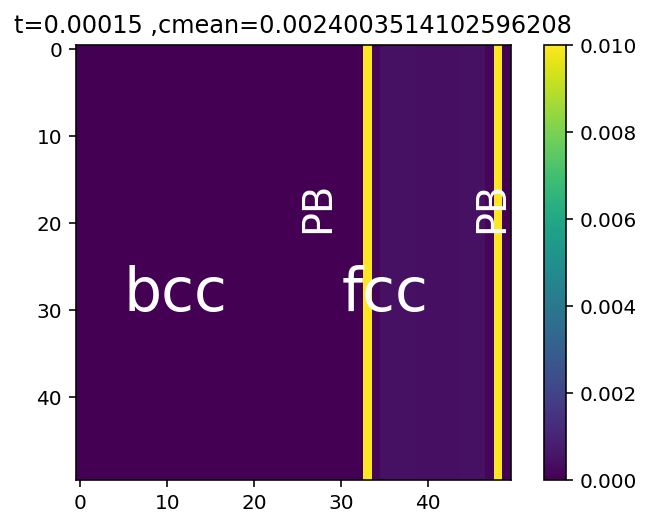

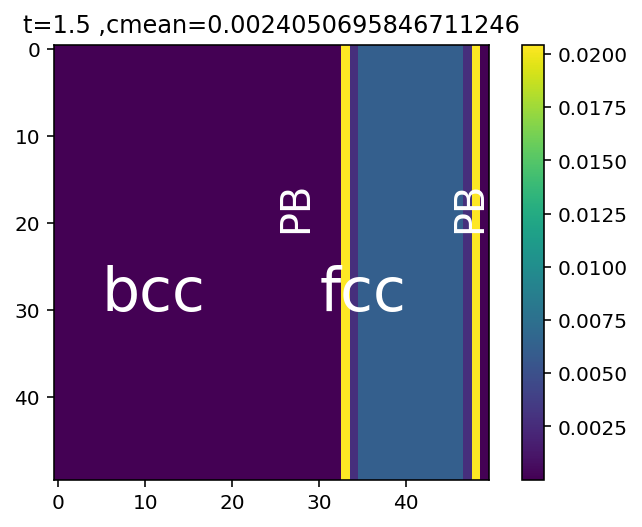

In [20]:
t = 0
phi_init = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_init)
plt.clim(0, 0.01)
plt.colorbar();
plt.title('t='+str(t)+' ,cmean='+str(phi_init.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(5,20,'charging region',color='white',fontsize=20,rotation=90)

plt.show()
t = 0.00000150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.clim(0, 0.01)
plt.colorbar();
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,10,'PB',color='white',fontsize=20,rotation=90)
plt.show()
t = 0.0000150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.clim(0, 0.01)
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.colorbar();
plt.show()
t =  0.000150
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
plt.clim(0, 0.01)
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.colorbar();
plt.show()
t =  1.50
phi_final = np.einsum(
    'ij,jk,k,j->i', M, np.linalg.inv(M), phi.flatten(), np.exp(-omega * t), optimize=True
).reshape(phi.shape).real
plt.imshow(phi_final)
plt.title('t='+str(t)+' ,cmean='+str(phi_final.mean()))
#plt.clim(0, 0.01)
plt.text(30,30,'fcc',color='white',fontsize=30)
plt.text(5,30,'bcc',color='white',fontsize=30)
plt.text(25,20,'PB',color='white',fontsize=20,rotation=90)
plt.text(45,20,'PB',color='white',fontsize=20,rotation=90)
plt.colorbar();
plt.show()

In [383]:
phi_final[10,40]

0.006476683215407737

In [384]:
phi_final[20,10]

2.4199189106037773e-09